# Scale-free network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from ipywidgets import interact, interactive, fixed

#output_path = '/cluster/home/buchsr/output'
#save_path = '/cluster/home/buchsr/opinion-formation/media'

output_path = '/Users/romainbuchs/Documents/ETHZ/Modelling and Simulating Social Systems/output'
save_path =  '/Users/romainbuchs/Documents/ETHZ/Modelling and Simulating Social Systems/opinion-formation/media'

In [2]:
tag = 'scalefree_cluster'
n = 400
m = 3
n_iter = 100
all_p = np.arange(0,1.2,0.2)
all_phis = np.arange(0,1,0.01)

In [3]:
S = []
for p in all_p:
    list_files = glob.glob('{0}/ComponentsSize_{1}_n{2}_m{3}_gamma10_niter{4}_p_{5}_phi*.npy'.format(output_path, tag, 
                                                                                                     n, m, n_iter,
                                                                                                    p))
    phis = [float(f.split('phi_')[1].split('.npy')[0]) for f in list_files]
    idx = np.argsort(phis)
    phis = np.array(phis)[idx]
    id_undone = [i+1 for i, phi in enumerate(all_phis) if phi not in phis]
    list_files = np.array(list_files)[idx]
    print(len(list_files))
    print(list_files[0])
    s = []
    size = np.arange(0, n+1, 1)
    for f in list_files:
        s.append([max(size[real!=0]) for real in np.load(f)])
    s = np.stack(s)
    S.append(s)

100
/Users/romainbuchs/Documents/ETHZ/Modelling and Simulating Social Systems/output/ComponentsSize_scalefree_cluster_n400_m3_gamma10_niter100_p_0.0_phi_0.0.npy
100
/Users/romainbuchs/Documents/ETHZ/Modelling and Simulating Social Systems/output/ComponentsSize_scalefree_cluster_n400_m3_gamma10_niter100_p_0.2_phi_0.0.npy
100
/Users/romainbuchs/Documents/ETHZ/Modelling and Simulating Social Systems/output/ComponentsSize_scalefree_cluster_n400_m3_gamma10_niter100_p_0.4_phi_0.0.npy
100
/Users/romainbuchs/Documents/ETHZ/Modelling and Simulating Social Systems/output/ComponentsSize_scalefree_cluster_n400_m3_gamma10_niter100_p_0.6000000000000001_phi_0.0.npy
100
/Users/romainbuchs/Documents/ETHZ/Modelling and Simulating Social Systems/output/ComponentsSize_scalefree_cluster_n400_m3_gamma10_niter100_p_0.8_phi_0.0.npy
100
/Users/romainbuchs/Documents/ETHZ/Modelling and Simulating Social Systems/output/ComponentsSize_scalefree_cluster_n400_m3_gamma10_niter100_p_1.0_phi_0.0.npy


Keep n=400 fixed and vary p -> no effect:

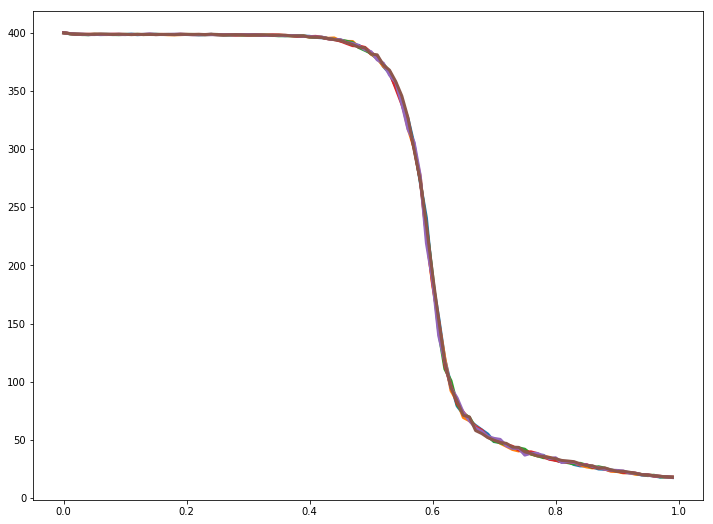

In [4]:
fig, ax = plt.subplots(figsize=(12, 9))
for i, (biggest_coms, ps) in enumerate(zip(S, all_p)):
    ax.plot(all_phis, biggest_coms.mean(axis=1), color='C{0}'.format(i), linewidth=3, 
            label='p = {0}'.format(ps))

Take only p=0.04

In [5]:
list_files = glob.glob('{0}/ComponentsSize_{1}_n{2}_m{3}_gamma10_niter{4}_p_{5}_phi*.npy'.format(output_path, tag, 
                                                                                                     400, 3, n_iter,
                                                                                                    0.4))
dfs = [np.load(path) for path in list_files]

In [6]:
def plot_dist(i, dfs, size, phis, rescale=True):
    fig, ax = plt.subplots(figsize=(12, 6))

    df_proba = dfs[i].sum(axis=0)/dfs[i].sum()
    if rescale==True:
        biggest_community = size[df_proba!=0].max()
    else:
        biggest_community = len(size)
        
    y = df_proba[1:biggest_community]#*size[1:biggest_community]
    y = y/y.sum()

    ax.scatter(size[1:biggest_community], y, color='C1')

    ax.set_title('phi={0}'.format(phis[i]))
    ax.set_xlabel('$s$', fontsize=26)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim((1e-5,1))
    ax.set_ylabel('$P(s)$', fontsize=26)
    ax.tick_params(labelsize=22)

In [7]:
interact(plot_dist, i=(0,100,1), dfs=fixed(dfs), size=fixed(size), phis=fixed(phis), rescale=True)

interactive(children=(IntSlider(value=50, description='i'), Checkbox(value=True, description='rescale'), Outpu…

<function __main__.plot_dist(i, dfs, size, phis, rescale=True)>

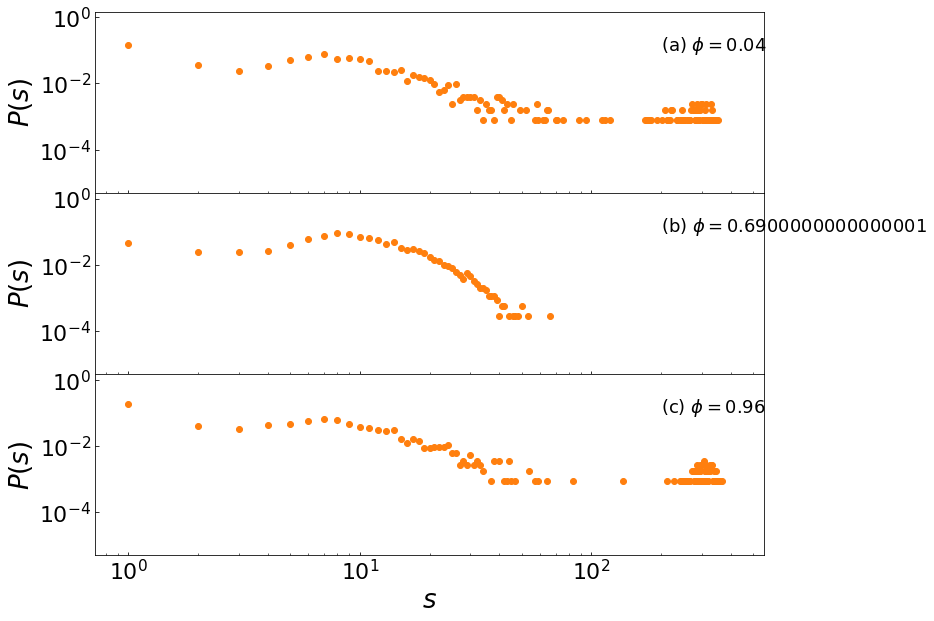

In [8]:
fig, ax = plt.subplots(figsize=(12, 10), nrows=3, sharex=True)
rescale=False
set_phi = [4, 69, 96]
letter = 'abc'
for idx, (i,l) in enumerate(zip(set_phi, letter)):
    df_proba = dfs[i].sum(axis=0)/dfs[i].sum()
    if rescale==True:
        biggest_community = size[df_proba!=0].max()
    else:
        biggest_community = len(size)

    x = size[1:biggest_community]    
    y = df_proba[1:biggest_community]


    ax[idx].scatter(size[1:biggest_community], y, color='C1')
    ax[idx].set_xscale('log')
    ax[idx].set_yscale('log')
    ax[idx].set_ylim((5e-6,1.5))
    ax[idx].set_ylabel('$P(s)$', fontsize=26)
    ax[idx].tick_params(labelsize=22, direction='in', which='both')
    ax[idx].text(200, 1e-1, '({0}) $\phi = {1}$'.format(l, phis[i]), fontsize=18)
ax[2].set_xlabel('$s$', fontsize=26)
plt.subplots_adjust(hspace=0)

Take n=200, 400, 600 and p=0.2

In [9]:
S = []
all_n = [200, 400, 600]
for n_i in all_n:
    list_files = glob.glob('{0}/ComponentsSize_{1}_n{2}_m{3}_gamma10_niter{4}_p_{5}_phi*.npy'.format(output_path, tag, 
                                                                                                     n_i, m, n_iter,
                                                                                                    0.2))
    phis = [float(f.split('phi_')[1].split('.npy')[0]) for f in list_files]
    idx = np.argsort(phis)
    phis = np.array(phis)[idx]
    id_undone = [i+1 for i, phi in enumerate(all_phis) if phi not in phis]
    list_files = np.array(list_files)[idx]
    print(len(list_files))
    print(list_files[0])
    s = []
    size = np.arange(0, n_i+1, 1)
    for f in list_files:
        s.append([max(size[real!=0]) for real in np.load(f)])
    s = np.stack(s)
    S.append(s)

100
/Users/romainbuchs/Documents/ETHZ/Modelling and Simulating Social Systems/output/ComponentsSize_scalefree_cluster_n200_m3_gamma10_niter100_p_0.2_phi_0.0.npy
100
/Users/romainbuchs/Documents/ETHZ/Modelling and Simulating Social Systems/output/ComponentsSize_scalefree_cluster_n400_m3_gamma10_niter100_p_0.2_phi_0.0.npy
100
/Users/romainbuchs/Documents/ETHZ/Modelling and Simulating Social Systems/output/ComponentsSize_scalefree_cluster_n600_m3_gamma10_niter100_p_0.2_phi_0.0.npy


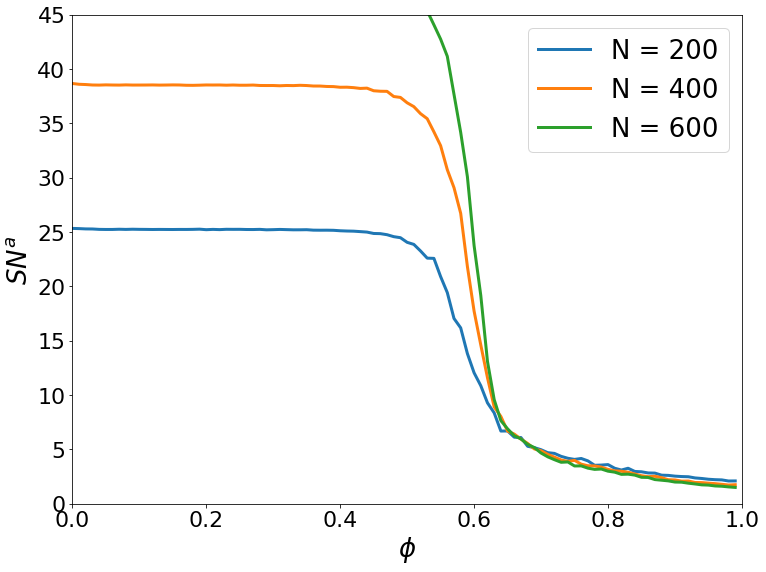

In [10]:
a = 0.61
fig, ax = plt.subplots(figsize=(12, 9))
for i, (biggest_coms, n_i) in enumerate(zip(S, all_n)):
    ax.plot(all_phis, biggest_coms.mean(axis=1)*n_i**(a-1), color='C{0}'.format(i), linewidth=3, 
            label='N = {0}'.format(n_i))

ax.set_xlabel('$\phi$', fontsize=26)
ax.set_ylabel('$SN^a$', fontsize=26)
ax.set_xlim((0,1))
ax.legend(fontsize=26)
ax.set_ylim((0,45))
ax.tick_params(labelsize=22)

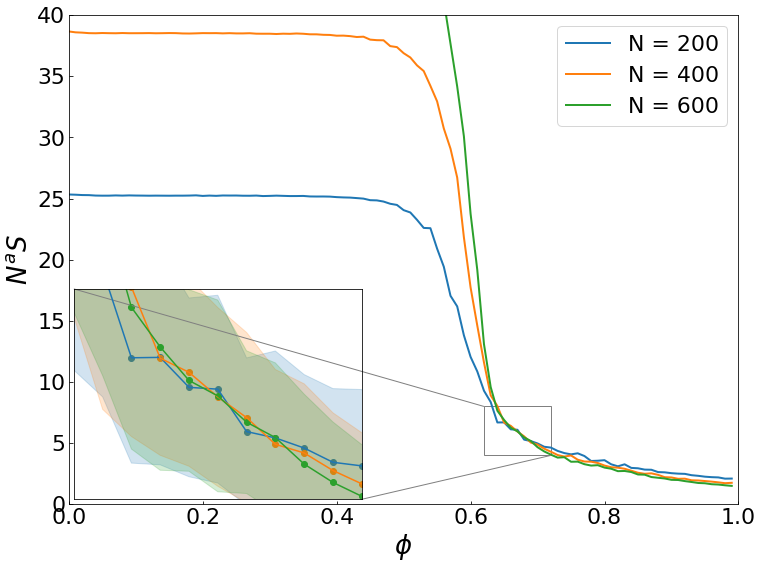

In [11]:
a = 0.61
fig, ax = plt.subplots(figsize=(12, 9))
axins = zoomed_inset_axes(ax, 4.3, loc=3) # zoom-factor: 2.5, location: upper-left

for i, (biggest_coms, n_i) in enumerate(zip(S, all_n)):
    ax.plot(all_phis, biggest_coms.mean(axis=1)*n_i**(a-1), color='C{0}'.format(i), linewidth=2, 
            label='N = {0}'.format(n_i))
    axins.fill_between(all_phis, biggest_coms.mean(axis=1)*n_i**(a-1)-biggest_coms.std(axis=1)*n_i**(a-1), 
                       biggest_coms.mean(axis=1)*n_i**(a-1)+biggest_coms.std(axis=1)*n_i**(a-1), alpha=0.2, color='C{0}'.format(i))
    axins.plot(all_phis, biggest_coms.mean(axis=1)*n_i**(a-1), color='C{0}'.format(i))
    axins.scatter(all_phis, biggest_coms.mean(axis=1)*n_i**(a-1), color='C{0}'.format(i))
    #axins.errorbar(all_phis, biggest_coms.mean(axis=1)*n[i]**(a-1), 
                #yerr=biggest_coms.std(axis=1)*n[i]**(a-1), fmt='o', capsize=5, color='C{0}'.format(i),
              #capthick=2)
    

x1, x2, y1, y2 = 0.62, 0.72, 4, 8 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
axins.xaxis.set_visible(False)
axins.yaxis.set_visible(False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
axins.tick_params(labelsize=12, direction='in')

ax.set_xlabel('$\phi$', fontsize=26)
ax.set_ylabel('$N^aS$', fontsize=26)
ax.set_xlim((0,1))
ax.legend(fontsize=22, ncol=1, loc=1)
ax.set_ylim((0,40))
ax.tick_params(labelsize=22, direction='in')

#plt.savefig(save_path + '/Fig_scalefree.png', dpi=300, format='png')
#plt.savefig(save_path + '/Fig_scalefree.pdf', dpi=300, format='pdf')

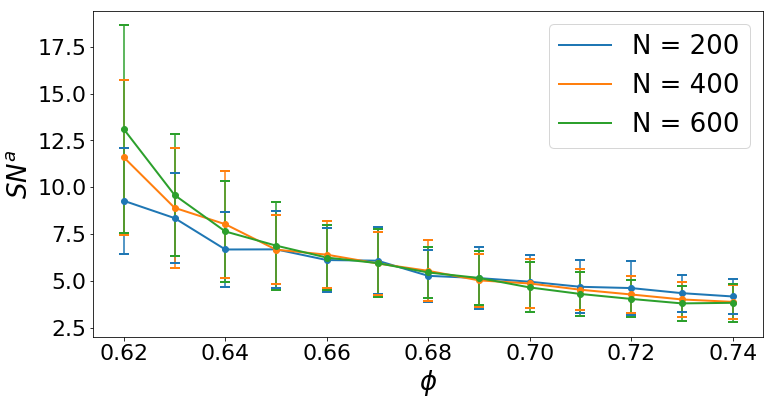

In [12]:
a = 0.61
fig, ax = plt.subplots(figsize=(12, 6))
plotrange = [62, 75]
for i, (biggest_coms, n_i) in enumerate(zip(S, all_n)):
    ax.plot(all_phis[plotrange[0]:plotrange[1]], biggest_coms.mean(axis=1)[plotrange[0]:plotrange[1]]*n_i**(a-1), color='C{0}'.format(i), linewidth=2, 
            label='N = {0}'.format(n_i))
    ax.errorbar(all_phis[plotrange[0]:plotrange[1]], biggest_coms.mean(axis=1)[plotrange[0]:plotrange[1]]*n_i**(a-1), 
                yerr=biggest_coms.std(axis=1)[plotrange[0]:plotrange[1]]*n_i**(a-1), fmt='o', capsize=5, color='C{0}'.format(i),
               capthick=2)


ax.set_xlabel('$\phi$', fontsize=26)
ax.set_ylabel('$SN^a$', fontsize=26)
ax.legend(fontsize=26)
ax.tick_params(labelsize=22)

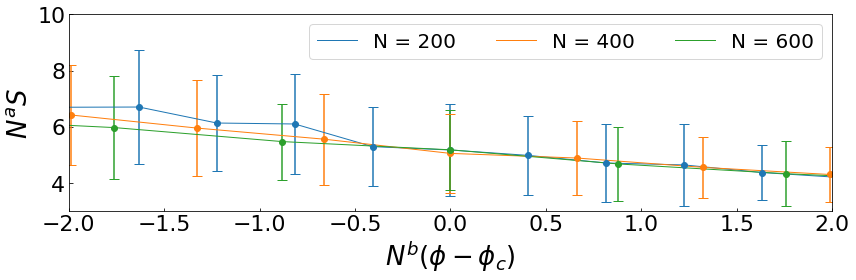

In [13]:
a = 0.61
b = 0.7
phi_c_1 = 0.69
fig, ax = plt.subplots(figsize=(12, 4))
for i, (biggest_coms, n_i) in enumerate(zip(S, all_n)):

    ax.plot((all_phis-phi_c_1)*n_i**b, biggest_coms.mean(axis=1)*n_i**(a-1), color='C{0}'.format(i), linewidth=1, 
            label='N = {0}'.format(n_i))
    ax.errorbar((all_phis-phi_c_1)*n_i**b, biggest_coms.mean(axis=1)*n_i**(a-1), yerr=biggest_coms.std(axis=1)*n_i**(a-1), fmt='o', capsize=5, color='C{0}'.format(i))
  
ax.set_xlabel('$N^b(\phi-\phi_c)$', fontsize=26)
ax.set_xlim((-2,2))

ax.set_ylabel('$N^aS$', fontsize=26)

ax.set_ylim((3,10))

ax.legend(fontsize=20, ncol=3)

ax.tick_params(labelsize=22, direction='in')

plt.tight_layout()

#plt.savefig(save_path + '/Fig_scalefree_b.png', dpi=300, format='png')
#plt.savefig(save_path + '/Fig3_scalefree_b.pdf', dpi=300, format='pdf')